In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fivethirtyeight-comic-characters-dataset/marvel-wikia-data.csv
/kaggle/input/fivethirtyeight-comic-characters-dataset/README.md
/kaggle/input/fivethirtyeight-comic-characters-dataset/dc-wikia-data.csv
/kaggle/input/img-iris/sepal_petal.jpg
/kaggle/input/data-for-datavis/fifa.csv
/kaggle/input/data-for-datavis/ign_scores.csv
/kaggle/input/data-for-datavis/spotify.csv
/kaggle/input/data-for-datavis/flight_delays.csv
/kaggle/input/data-for-datavis/iris_setosa.csv
/kaggle/input/data-for-datavis/insurance.csv
/kaggle/input/data-for-datavis/cancer.csv
/kaggle/input/data-for-datavis/cancer_b.csv
/kaggle/input/data-for-datavis/cancer_m.csv
/kaggle/input/data-for-datavis/iris_virginica.csv
/kaggle/input/data-for-datavis/iris.csv
/kaggle/input/data-for-datavis/iris_versicolor.csv
/kaggle/input/data-for-datavis/candy.csv
/kaggle/input/data-for-datavis/museum_visitors.csv
/kaggle/input/img-insurance-spreadsheet/insurance_spreadsheet.png


## Data Visualization - Pandas and Seaborn

## Line chart

**Setup**

In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()  # ensure pd date-like values convert to be compatible with matplotlib date format
import matplotlib.pyplot as plt
# display plot inline in notebook
%matplotlib inline  
import seaborn as sns
print("Setup complete")

Setup complete


matplotlib.pyplot provides a more customizable and flexible plotting experience, suitable for a wide range of plot types. On the other hand, seaborn focuses on higher-level statistical visualizations and provides a simpler API with built-in stylistic choices. Depending on your needs, you can choose either library or even combine them to leverage their respective strengths.

**Load the data**

In [3]:

import os

# data file path
#file_path_spotify = "/kaggle/input/data-for-datavis/spotify.csv"
file_path_museum_visitors = "/kaggle/input/data-for-datavis/museum_visitors.csv"


# read the data file
museum_data = pd.read_csv(file_path_museum_visitors, index_col="Date", parse_dates=True)


## Bar chart and Heat map

Setup complete.


Text(0, 0.5, 'Arrival delay (in minutes)')

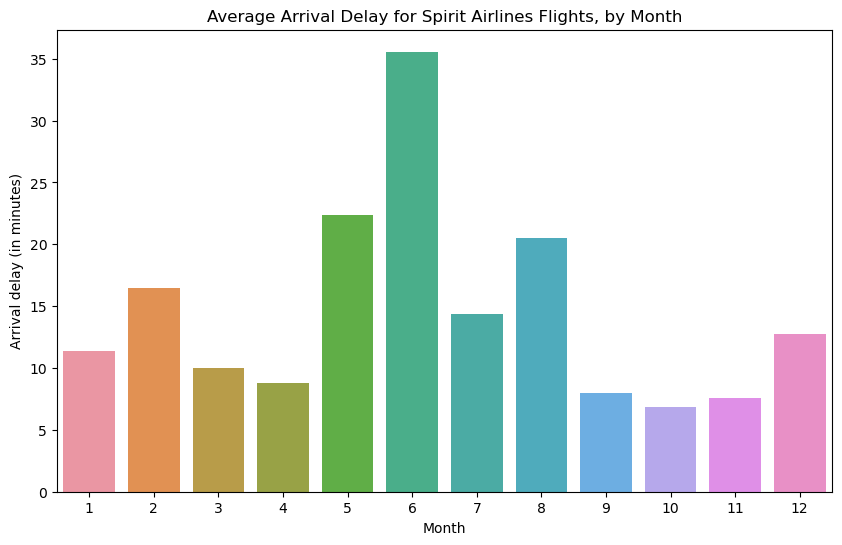

In [4]:
#----------------------
# Set up the notebook
#----------------------
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup complete.")

#----------------------
# Select a dataset
#----------------------
# US Department of Transportation that tracks flight delays from 2015 (flight_delays.csv)

#----------------------
# Load the data
#----------------------
# file path & read
flight_filepath = "/kaggle/input/data-for-datavis/flight_delays.csv"
flight_data = pd.read_csv(flight_filepath, index_col="Month")
#print(flight_data)

#----------------------
# Create a Bar chart
#----------------------
# create a bar chart showing the average arrival delay for Spirit Airlines (airline code: NK) flights, by month.

# Set plot size, title , draw chart, add axis label
plt.figure(figsize=(10,6))
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")
sns.barplot(x=flight_data.index, y=flight_data['NK'])
plt.ylabel("Arrival delay (in minutes)")

Text(0.5, 47.7222222222222, 'Airline')

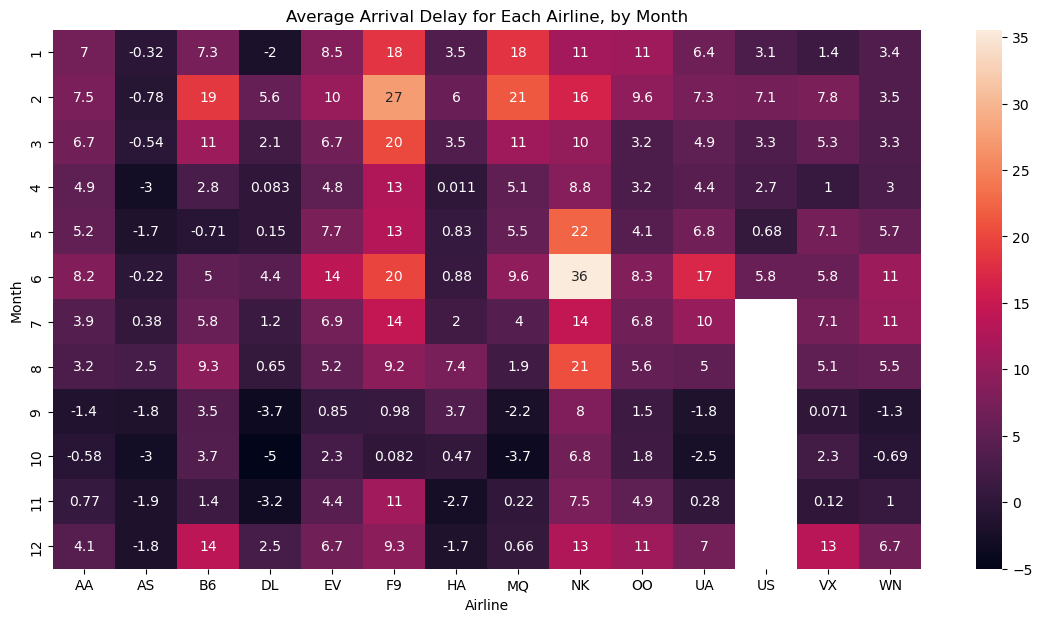

In [5]:
# Create a Heat map with the entire data

# plot size, title, plot, label
plt.figure(figsize=(14, 7))
plt.title("Average Arrival Delay for Each Airline, by Month")
sns.heatmap(data=flight_data, annot=True)
plt.xlabel("Airline")


# Scatter plots
* Dataset: synthetic data of insurance charges   
* Learn About the: [dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance)
* Question: 
> ***Why are some customers paying more premiums than others?***   
![](https://storage.googleapis.com/kaggle-media/learn/images/1nmy2YO.png)

**1. Data file path & read**

In [6]:
# path
insurance_filepath = "/kaggle/input/data-for-datavis/insurance.csv"

# read
insurance_data = pd.read_csv(insurance_filepath)

**2. Check the data**

In [7]:
insurance_data.describe()
insurance_data.head()
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


**3. Scatter plot with x-axis and y-axis**

<Axes: xlabel='bmi', ylabel='charges'>

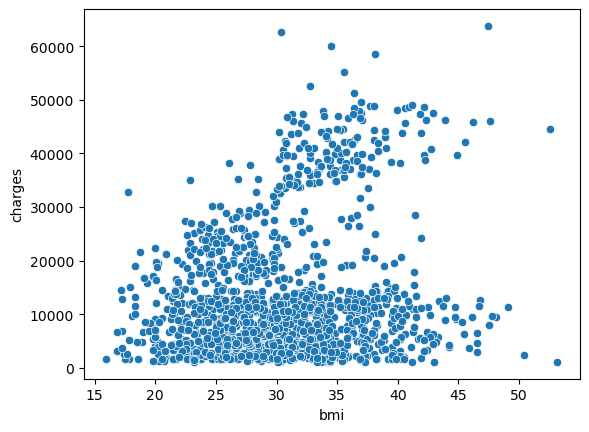

In [8]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])

**4. Observe the correlation**
* 'bmi'([Body Mass Index](https://en.wikipedia.org/wiki/Body_mass_index)) and 'charges' showing positively related, higher BMI --> higher health risk -> higher charges
* **Regression line** to display the **strength** of the correlation


<Axes: xlabel='bmi', ylabel='charges'>

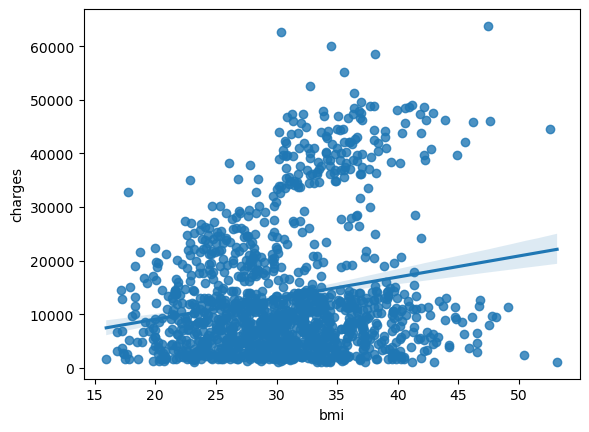

In [9]:
# regression line using regplot - the line that best fits the data
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])

**5. Add another variable to the plot, how does it affect the relationship between bmi and charges?**

<Axes: xlabel='bmi', ylabel='charges'>

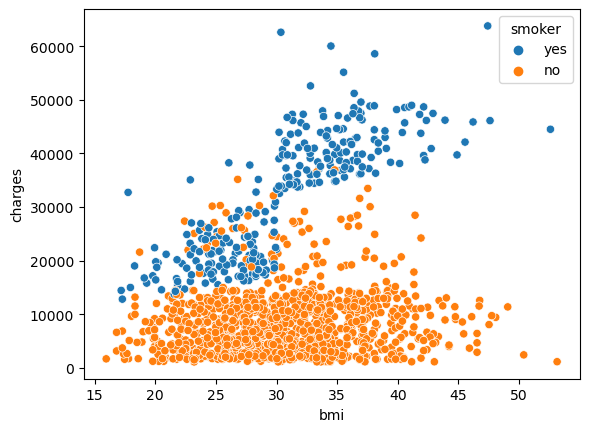

In [10]:
# Add 'smoker' field to the existing scatter plot, using color code (hue=)
sns.scatterplot(x=insurance_data['bmi'],y=insurance_data['charges'],hue=insurance_data['smoker'])

**6. Observe the correlation**
* nonsmokers to tend to pay slightly more with increasing BMI, smokers pay MUCH more.
* **How strong** is the correlations? Draw regression lines for each group - nonsmokers, smokers
* sns.lmplot(): Linear Model Plot, Observe the **slope of each line**


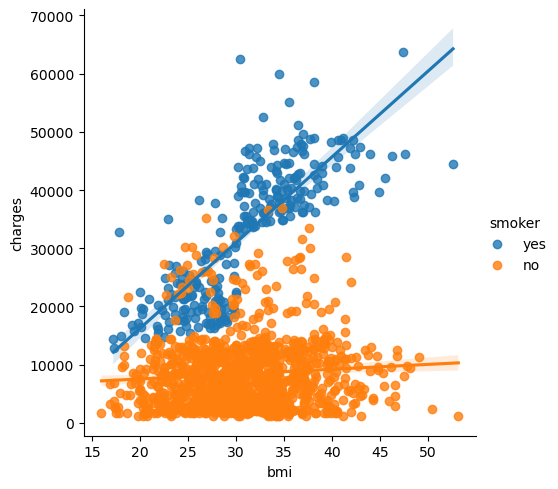

In [11]:
sns.lmplot(x='bmi', y='charges', hue='smoker', data=insurance_data)

**7. Draw Swarm Plot using sns.swarmplot()**     

Usually, we use **scatter plots** to highlight the relationship between **two continuous variables** (like "bmi" and "charges"). However, we can adapt the design of the scatter plot to feature a **categorical variable (like "smoker") on one of the main axes**, referred as **categorical scatter plot**

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='smoker', ylabel='charges'>

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


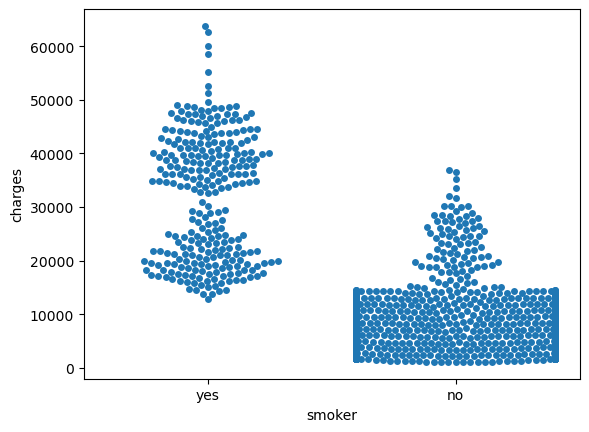

In [12]:
# draw swarmplot() with 'smoker' on x-axis and 'charges' on y-axis
# smoker - categorical variable
# charges - continuous variable
sns.swarmplot(x=insurance_data['smoker'], y=insurance_data['charges'])

**8. Observe the correlation**
* on average, non-smokers are charged less than smokers, and
* the customers who pay the most are smokers; whereas the customers who pay the least are non-smokers.

**Recap: Scatter Plots**   
**scenario:**
* You work for a major candy producer.   
* Your goal is to write a report that your company can use to guide the design of its next product.   
* Soon after starting your research, you stumble across this very interesting [dataset](https://fivethirtyeight.com/videos/the-ultimate-halloween-candy-power-ranking/) containing results from a fun survey to crowdsource favorite candies.   


**Setup**

In [13]:
# import packages and settings
import pandas as pd
pd.plotting.deregister_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup complet.")

Setup complet.


**Step 1: Load the Data**   
candy.csv

In [14]:
# path to the data file
candy_filepath = "/kaggle/input/data-for-datavis/candy.csv"

# load the data, set 'id' column as row index
candy_data = pd.read_csv(candy_filepath, index_col="id")

**Step 2: Review the data**

In [15]:
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


* '**competitorname**' contains the name of the candy bar.
* the next **9** columns (from '**chocolate**' to '**pluribus**') describe the candy. For instance, rows with chocolate candies have "**Yes**" in the 'chocolate' column (and candies without chocolate have "**No**" in the same column).
* '**sugarpercent**' provides some indication of the amount of sugar, where higher values signify higher sugar content.
* '**pricepercent**' shows the price per unit, relative to the other candies in the dataset.
* '**winpercent**' is calculated from the survey results; higher values indicate that the candy was more popular with survey respondents.
1. > Which candy was more popular with survey respondents: '3 Musketeers' or 'Almond Joy'?   
1. > Which candy has higher sugar content: 'Air Heads' or 'Baby Ruth'?

**Step 3: The role of sugar**
> *Do people tend to refer candies with higher sugar content?*

<Axes: xlabel='sugarpercent', ylabel='winpercent'>

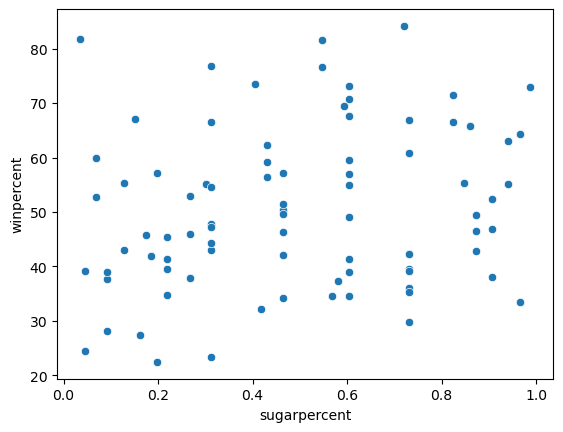

In [16]:
# Create a scatter plot to shows the relationship between
# 'sgarpercent' on x-axis and winpercent on y-axis

#sns.scatterplot(x='sugarpercent', y='winpercent', data=candy_data)
sns.scatterplot(x=candy_data['sugarpercent'], y=candy_data[
    'winpercent'])


> *Does the scatter plot show a **strong** correlation between the two variables? If so, are candies with more sugar relatively more or less popular with the survey respondents? *    

The scatter plot does not show a strong correlation between the two variables. Since there is **no clear relationship** between the two variables, this tells us that **sugar content does not play a strong role in candy popularity.**

**Step 4: Take a closer look**     

Create the same scatter plot with **regression line** this time - seaborn.regplot()

<Axes: xlabel='sugarpercent', ylabel='winpercent'>

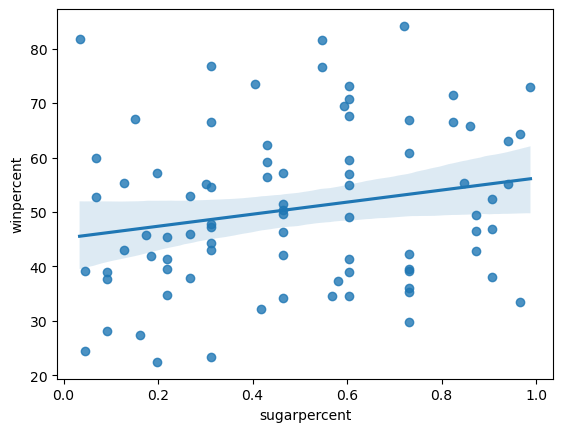

In [17]:
# Scatter plot w/ regression line showing the relationship between 'sugarpercent' and 'winpercent'
sns.regplot(x=candy_data['sugarpercent'], y=candy_data['winpercent'])

> *According to the plot above, is there a **slight** correlation between 'winpercent' and 'sugarpercent'? What does this tell you about the candy that people tend to prefer?*  

Since the regression line has a **slightly positive slope**, this tells us that there is a slightly positive correlation between 'winpercent' and 'sugarpercent'. Thus, people have a slight preference for candies containing relatively more sugar.

**Step 5: Chocolate!**
Create a scatter plot to show the relationship between '**pricepercent**' (on the horizontal x-axis) and '**winpercent**' (on the vertical y-axis). Use the 'chocolate' column to **color-code** the points

<Axes: xlabel='pricepercent', ylabel='winpercent'>

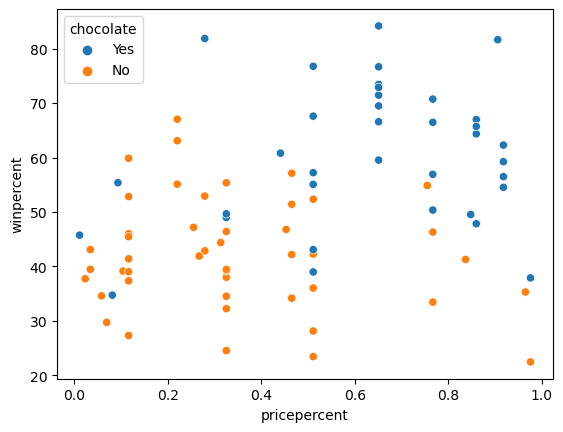

In [18]:
# Scatter plot showing the relationship between 'pricepercent'   
sns.scatterplot(x=candy_data['pricepercent'], y=candy_data['winpercent'], hue=candy_data["chocolate"])

**Step 6: Investigate chocolate**

Create the same scatter plot you created in Step 5, but now with two regression lines, corresponding to (1) chocolate candies and (2) candies without chocolate.

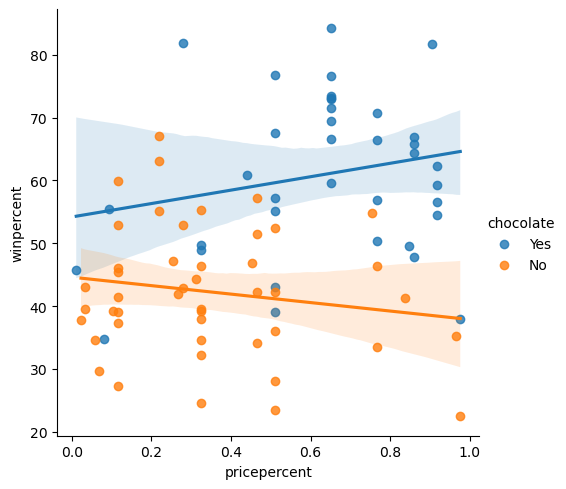

In [19]:
sns.lmplot(x='pricepercent', y='winpercent', hue='chocolate', data=candy_data)

Using the regression lines, what conclusions can you draw about the effects of chocolate and price on candy popularity?

> *Looking at positive or negative slope...Since this line has a slightly positive slope, we can say that more expensive chocolate candies tend to be more popular (than relatively cheaper chocolate candies). Likewise, since the regression line for candies without chocolate has a negative slope, we can say that if candies don't contain chocolate, they tend to be more popular when they are cheaper. One important note, however, is that the dataset is quite small -- so we shouldn't invest too much trust in these patterns! To inspire more confidence in the results, we should add more candies to the dataset.*


**Step 7: Everybody loves chocolate**   
Categorical scatter with categorical value

<Axes: xlabel='chocolate', ylabel='winpercent'>

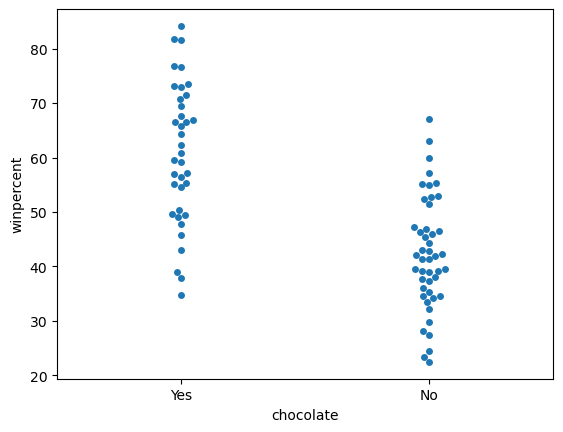

In [20]:
# scatter plot showing the relationshiop between'chocolate' and    
# 'winpercent' - 'chocolate' is a categorical value
sns.swarmplot(x=candy_data['chocolate'], y=candy_data['winpercent'])


You decide to dedicate a section of your report to the fact that chocolate candies tend to be more popular than candies without chocolate. Which plot is more appropriate to tell this story: the plot from **Step 6**, or the plot from **Step 7**?   
> *Which plot communicates more information? In general, it's good practice to **use the simplest plot** that tells the **entire story** of interest.* In this case, the categorical scatter plot from Step 7 is the more appropriate plot. While both plots tell the desired story, **the plot from Step 6 conveys far more information that could distract** from the main point.

# Distributions (Histogram and Density Plot)
* Dataset: 150 different flowers, or 50 each from three different species of iris (Iris setosa, Iris versicolor, and Iris virginica). - iris.csv    
 
![](https://storage.googleapis.com/kaggle-media/learn/images/RcxYYBA.png)

**Load and examine the data**

In [21]:
# path
iris_filepath = "/kaggle/input/data-for-datavis/iris.csv"

# load with 'id' column as index_col
iris_data = pd.read_csv(iris_filepath, index_col="Id")

# print the first 5
iris_data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


![Sepal and Petal](https://biologyreader.com/wp-content/uploads/2022/05/sepals-vs-petals.jpg)

**Histograms**   
See **how petal length varies** in iris flowers.    
**sns.histplot()**

<Axes: xlabel='Petal Length (cm)', ylabel='Count'>

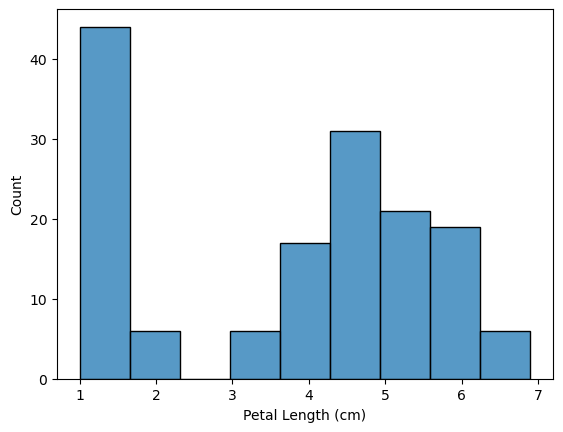

In [22]:
# Histogram
# how petal length varies - length bins and counts
sns.histplot(iris_data["Petal Length (cm)"])

<Axes: xlabel='Petal Length (cm)', ylabel='Density'>

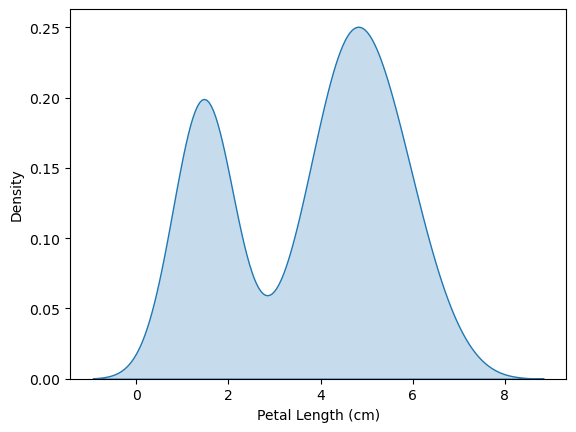

In [23]:
# KDE plot (Kernel Density Estimate) - smoothed histogram
# sns.kedplot() fill= , data=
sns.kdeplot(data=iris_data['Petal Length (cm)'], fill=True)

In addition to the 2D KDE plot in the center,    

* The curve at the top of the figure is a KDE plot for the data on the x-axis (in this case, iris_data['Petal Length (cm)']), and
* The curve on the right of the figure is a KDE plot for the data on the y-axis (in this case, iris_data['Sepal Width (cm)']).

**color-coded plot**

Text(0.5, 1.0, 'Histogram of Petal Lengths, by Species')

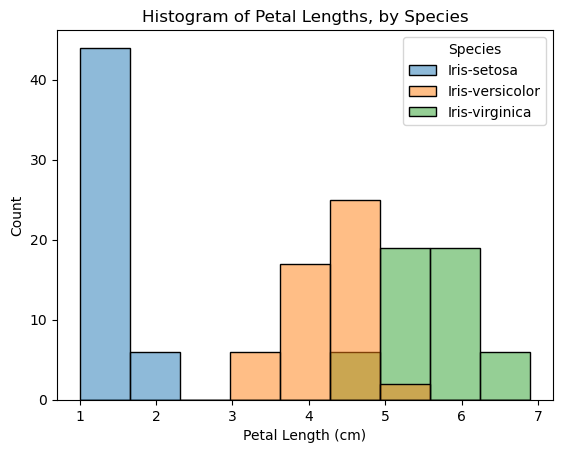

In [24]:
# histogram to understand the differencies between the iris species
# sns.histplot(data=, x= hue= )
sns.histplot(data=iris_data, x='Petal Length (cm)', hue='Species')
plt.title("Histogram of Petal Lengths, by Species")


Text(0.5, 1.0, 'Distribution of Petal Lengths, by Species')

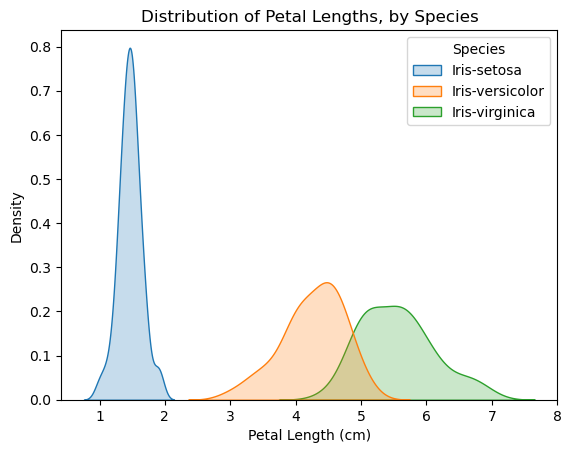

In [25]:
# Create KDE plot for the same above
sns.kdeplot(data=iris_data, x='Petal Length (cm)', hue='Species', fill=True)
plt.title("Distribution of Petal Lengths, by Species")

**Observations**:    
> *One interesting pattern that can be seen in plots is that the plants seem to belong to one of two groups, where Iris versicolor and Iris virginica seem to have similar values for petal length, while Iris setosa belongs in a category all by itself.
> 
> In fact, according to this dataset, we might even be able to classify any iris plant as Iris setosa (as opposed to Iris versicolor or Iris virginica) just by looking at the petal length: if the petal length of an iris flower is less than 2 cm, it's most likely to be Iris setosa!*

**Recap: Distributions**   
Propose a solution to a real-world scenario. Uou will need to import data into Python, answer questions using the data, and generate **histograms** and **density plots** to *understand patterns* in the data.   
**Scenario:**
* You'll work with a real-world dataset containing information collected from microscopic images of breast cancer tumors   
* Each tumor has been labeled as either **[benign](https://en.wikipedia.org/wiki/Benign_tumor)** (noncancerous) or **malignant** (cancerous).   
* Learn how this kind of data is used to create intelligent algorithms to classify tumors in medical settings, watch the short video at this **[link](https://www.youtube.com/watch?v=9Mz84cwVmS0)**.
![](https://storage.googleapis.com/kaggle-media/learn/images/qUESsJe.png)


**Setup**

In [26]:
# import pacakges and apply settings
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup complete")

Setup complete


**Step 1: Load the data**

In [27]:
# path of the files
cancer_filepath = "/kaggle/input/data-for-datavis/cancer.csv"

# load
cancer_data = pd.read_csv(cancer_filepath, index_col="Id")

**Step 2: Review the data**

In [28]:
cancer_data.head()

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
Id,,,,,,,,,,,,,,,,,,,,,
8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In the dataset, each row corresponds to a different image. The dataset has 31 different columns, corresponding to:   

* 1 column ('Diagnosis') that classifies tumors as either benign (which appears in the dataset as **B**) or malignant (**M**), and
* 30 columns containing different measurements collected from the images. - cancer_b.csv, cancer_m.csv
* In the first five rows of the data, what is the # largest value for 'Perimeter (mean)'?
max_perim = 87.46
* What is the value for 'Radius (mean)' for the tumor with Id 8510824?
mean_radius = 9.504

**Step 3: Investigating differences**

Create two histograms that show the distribution in values for 'Area (mean)', separately for both benign and malignant tumors. (To permit easy comparison, create a single figure containing both histograms in the code cell below.)

Text(0.5, 1.0, 'Histograms of Cancer Tumor, by Diagnosis')

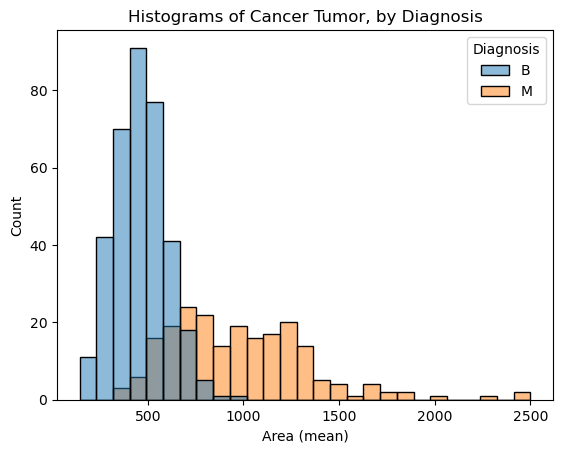

In [29]:
sns.histplot(x=cancer_data['Area (mean)'], hue=cancer_data['Diagnosis'])
plt.title("Histograms of Cancer Tumor, by Diagnosis")

**Observations**:     

alignant tumors have higher values for 'Area (mean)', on average. Malignant tumors have a larger range of potential values.

**Step 4: A very useful column**

Create two KDE plots (density) that show the distribution in values for 'Radius (worst)', separately for both benign and malignant tumores. Create a single figure containing both KDE plts.

<Axes: xlabel='Radius (worst)', ylabel='Density'>

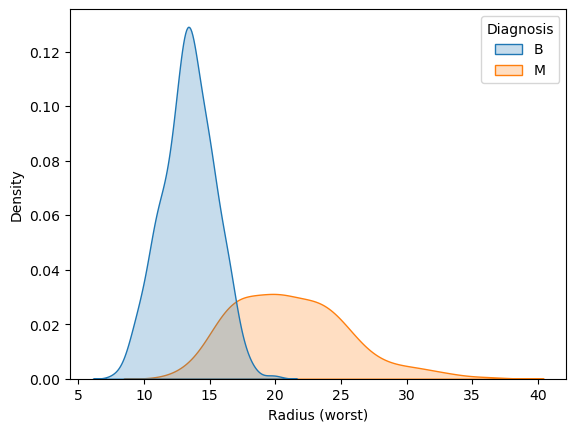

In [30]:
# KDE with single variable
sns.kdeplot(x=cancer_data['Radius (worst)'], hue=cancer_data['Diagnosis'], fill=True)

**Observations**:   
A hospital has recently started using an algorithm that can diagnose tumors with high accuracy. Given a tumor with a value for 'Radius (worst)' of 25, do you think the algorithm is more likely to classify the tumor as benign or malignant?    

> *The algorithm is more likely to classify the tumor as malignant. This is because the curve for malignant tumors is much higher than the curve for benign tumors around a value of 25 -- and an algorithm that gets high accuracy is likely to make decisions based on this pattern in the data.*

# Choosing Plot Types and Custom Styles

**Trends**   
A trend is defined as a pattern of change.
* sns.lineplot - Line charts are best to show trends over a period of time, and multiple lines can be used to show trends in more than one group.   

**Relationship** -    
There are many different chart types that you can use to understand relationships between variables in your data.
* sns.barplot - Bar charts are useful for comparing quantities corresponding to different groups.
* sns.heatmap - Heatmaps can be used to find color-coded patterns in tables of numbers.
* sns.scatterplot - Scatter plots show the relationship between two continuous variables; if color-coded, we can also show the relationship with a third categorical variable.
* sns.regplot - Including a regression line in the scatter plot makes it easier to see any linear relationship between two variables.
* sns.lmplot - This command is useful for drawing multiple regression lines, if the scatter plot contains multiple, color-coded groups.
* sns.swarmplot - Categorical scatter plots show the relationship between a continuous variable and a categorical variable.   

**Distribution**   
We visualize distributions to show the possible values that we can expect to see in a variable, along with how likely they are.
* sns.histplot - Histograms show the distribution of a single numerical variable.
* sns.kdeplot - KDE plots (or 2D KDE plots) show an estimated, smooth distribution of a single numerical variable (or two numerical variables).
* sns.jointplot - This command is useful for simultaneously displaying a 2D KDE plot with the corresponding KDE plots for each individual variable.

![](https://storage.googleapis.com/kaggle-media/learn/images/LPWH19I.png)

**Changing styles with Seaborn**

<Axes: xlabel='Date'>

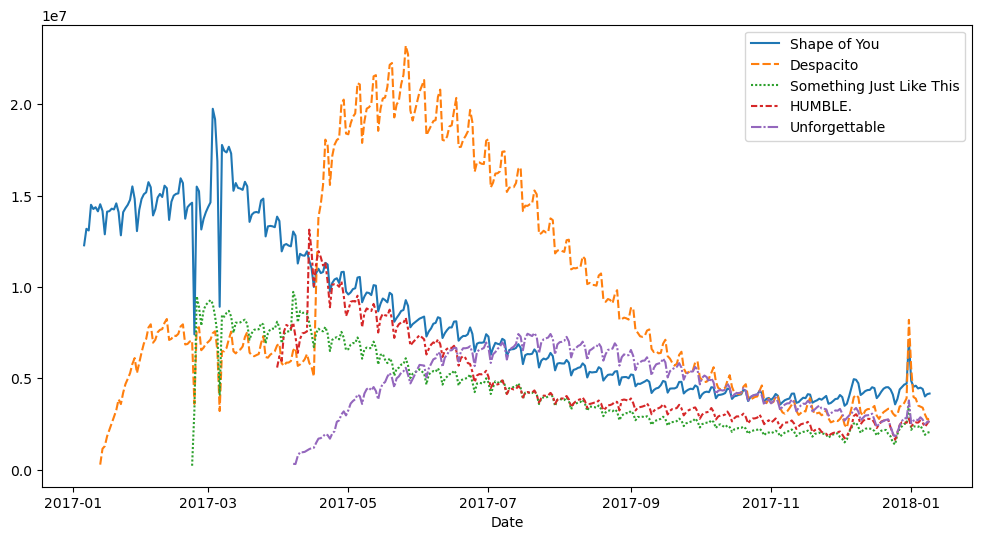

In [31]:
# Path - Will use the same spotify.csv file
spotify_filepath ="/kaggle/input/data-for-datavis/spotify.csv"

# Load
spotify_data = pd.read_csv(spotify_filepath, index_col="Date", parse_dates=True)

# Line chart
plt.figure(figsize=(12,6))
sns.lineplot(data=spotify_data)

<Axes: xlabel='Date'>

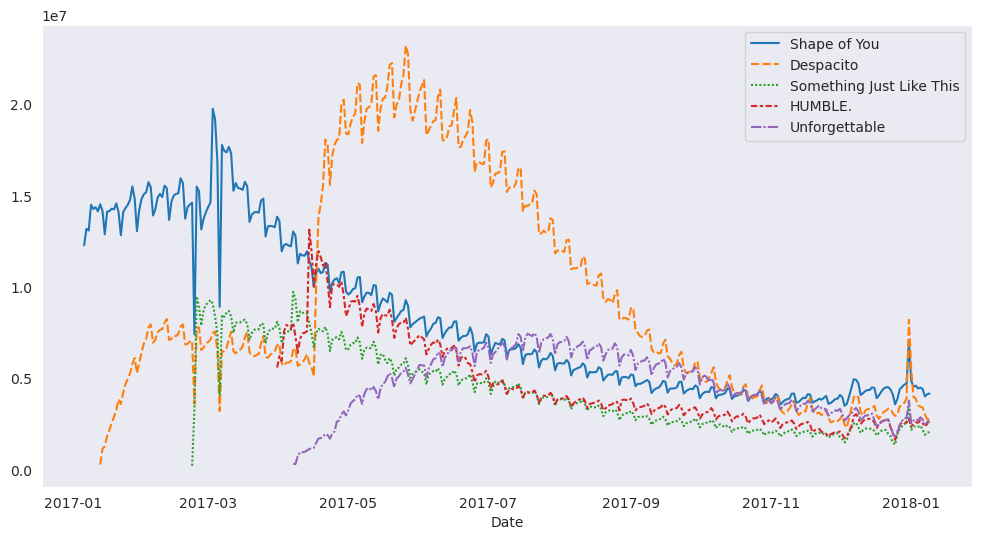

In [32]:
# Change the style of the figure to the "dark" theme
sns.set_style("dark")

# Line chart with changed style
plt.figure(figsize=(12,6))
sns.lineplot(data=spotify_data)

<Axes: xlabel='Date'>

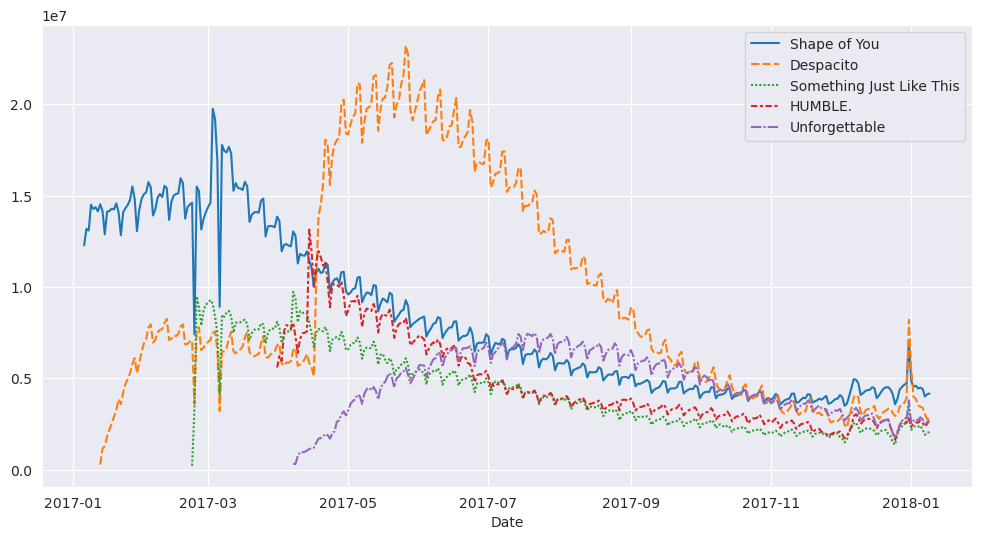

In [33]:
# Change the style of the figure to the "dark" theme
sns.set_style("darkgrid")

# Line chart with changed style
plt.figure(figsize=(12,6))
sns.lineplot(data=spotify_data)

<Axes: xlabel='Date'>

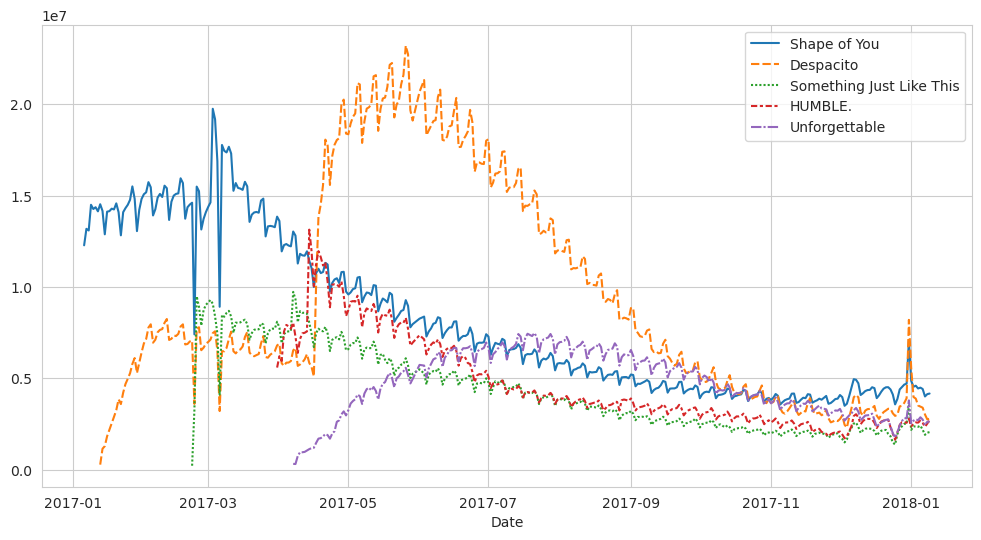

In [34]:
# Change the style of the figure to the "dark" theme
sns.set_style("whitegrid")

# Line chart with changed style
plt.figure(figsize=(12,6))
sns.lineplot(data=spotify_data)

<Axes: xlabel='Date'>

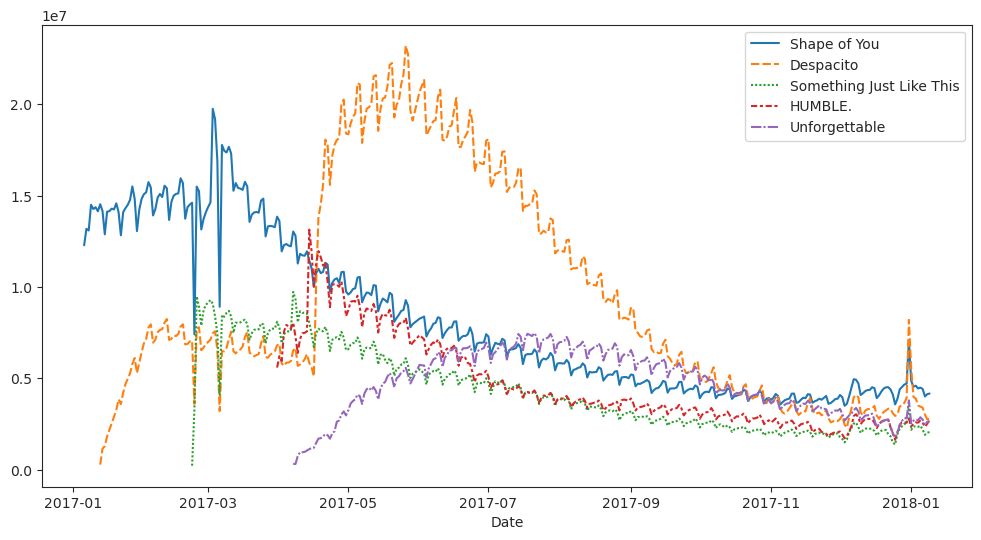

In [35]:
# Change the style of the figure to the "dark" theme
sns.set_style("ticks")

# Line chart with changed style
plt.figure(figsize=(12,6))
sns.lineplot(data=spotify_data)

<Axes: xlabel='Date'>

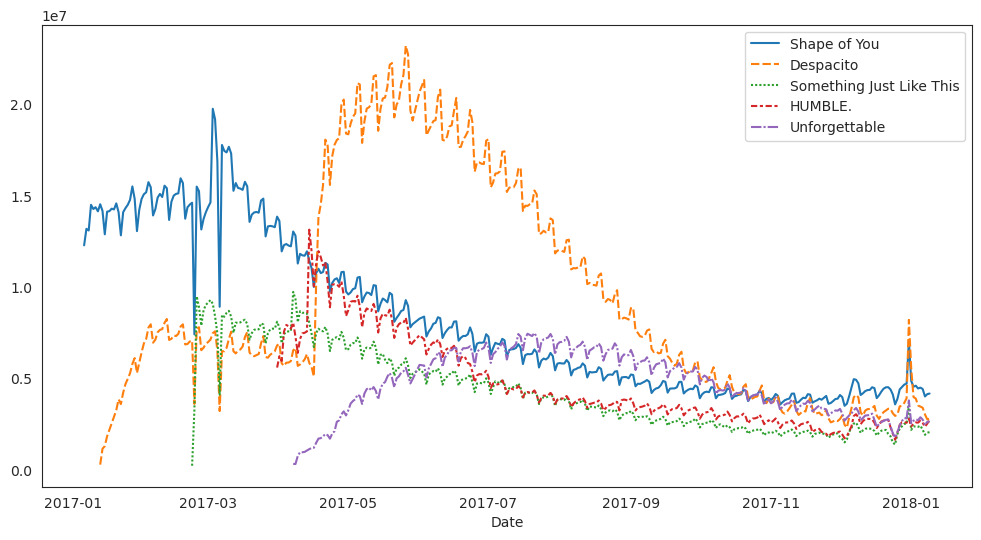

In [36]:
# Change the style of the figure to the "dark" theme
sns.set_style("white")

# Line chart with changed style
plt.figure(figsize=(12,6))
sns.lineplot(data=spotify_data)

# Final Project
Your own dataset

**Setup**

In [37]:
# import packages and apply settings
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("setup Complete")

setup Complete


**Step 1: Attach a dataset to the notebook**
FiveThirtyEight Comic Data from Kaggle datasets 
* README.md
* dc-wikia-data.csv
* marvel-wikia-data.csv


**Step 2: Specify the file path and load the data**

In [38]:
my_filepath = "/kaggle/input/fivethirtyeight-comic-characters-dataset/dc-wikia-data.csv"
my_data = pd.read_csv(my_filepath, index_col="page_id")

**Step 3: Review the data**

In [39]:
my_data

,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
page_id,,,,,,,,,,,,
1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0
...,...,...,...,...,...,...,...,...,...,...,...,...
66302,Nadine West (New Earth),\/wiki\/Nadine_West_(New_Earth),Public Identity,Good Characters,NaN,NaN,Female Characters,NaN,Living Characters,NaN,NaN,NaN
283475,Warren Harding (New Earth),\/wiki\/Warren_Harding_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
283478,William Harrison (New Earth),\/wiki\/William_Harrison_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN


**Step 4: Visualize the Data**    
Create some plots of your choice

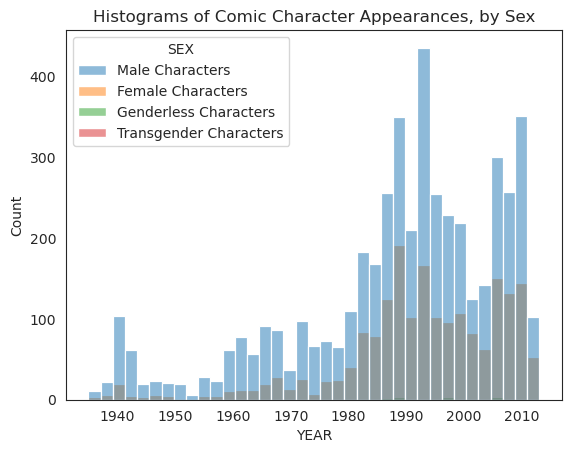

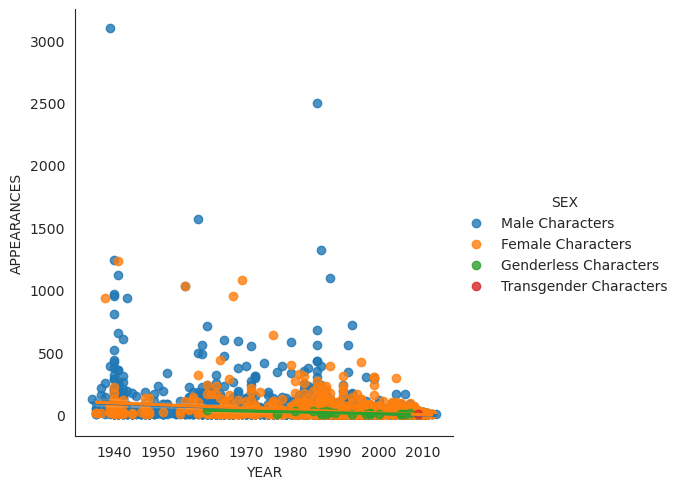

In [40]:
# Create a plot

sns.histplot(x=my_data['YEAR'], hue=my_data['SEX'])
plt.title("Histograms of Comic Character Appearances, by Sex")


sns.lmplot(x='YEAR', y='APPEARANCES', hue='SEX', data=my_data)